<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 1:</span> Data Wrangling</h1>
<hr>


Often, the most interesting machine learning applications require you to **wrangle** your data first.

For this project, we've been given a **transaction-level** dataset. In other words, each observation in the raw dataset is for a single transaction - one item, one customer, one purchase.

Therefore, to get a **customer-level** data (since we want to build clusters for customers, not transactions) we need to **aggregate transactions by customer** and **engineer customer-level features**.

* This step blends together exploratory analysis, data cleaning, and feature engineering.
* Here, feature engineering comes from aggregating the transaction-level data.
* As you'll see, you still have a lot of room for creativity in this step!

<br><hr id="toc">


# In this module, we will cover:

In the first phrase, we will go through the following data wrangling steps

1. Data Cleaning and exploration at raw transaction-level dataset
2. Feature engineering for customer level information
3. Joining multiple dataset

### First, let's import libraries and load the dataset.

In [1]:
# Commonly used data science packages: NumPy, Pandas, Matplotlib, Seaborn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Q1: check your working directory containing the dataset

In [2]:
# Your answer here:
import os
fname = 'data/int_online_tx.csv'
if os.path.isfile(fname):
    print(f'Data file: {fname} is available for use')
else:
    print(f'Data file: {fname} is missing!')

Data file: data/int_online_tx.csv is available for use


In [8]:
# %load solution/m1q1.py

Next, let's import the dataset.

In [3]:
# Load international online transactions data from CSV
data = pd.read_csv('data/int_online_tx.csv')

# 1. Raw dataset inspection and exploration

Even though we eventually want customer-level data, it's still helpful to do some basic exploratory analysis at the transaction level. 

commonly used pandas methods to understand what is inside loaded dataframe: shape, type, head, tail,sample


Q2: print out the dataframe information as shown below

In [5]:
# Your answer here:
print(data.shape)
print(data.dtypes)
print(data.head(3))

(35116, 8)
InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
   InvoiceNo StockCode                 Description  Quantity   InvoiceDate  \
0     536370     22728   ALARM CLOCK BAKELIKE PINK        24  12/1/10 8:45   
1     536370     22727   ALARM CLOCK BAKELIKE RED         24  12/1/10 8:45   
2     536370     22726  ALARM CLOCK BAKELIKE GREEN        12  12/1/10 8:45   

   UnitPrice  CustomerID Country  
0       3.75     12583.0  France  
1       3.75     12583.0  France  
2       3.75     12583.0  France  


In [ ]:
# %load solution/m1q2.py

(35116, 8)
InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
   InvoiceNo StockCode                      Description  Quantity  \
0     536370     22728        ALARM CLOCK BAKELIKE PINK        24   
1     536370     22727        ALARM CLOCK BAKELIKE RED         24   
2     536370     22726       ALARM CLOCK BAKELIKE GREEN        12   
3     536370     21724  PANDA AND BUNNIES STICKER SHEET        12   
4     536370     21883                 STARS GIFT TAPE         24   

    InvoiceDate  UnitPrice  CustomerID Country  
0  12/1/10 8:45       3.75     12583.0  France  
1  12/1/10 8:45       3.75     12583.0  France  
2  12/1/10 8:45       3.75     12583.0  France  
3  12/1/10 8:45       0.85     12583.0  France  
4  12/1/10 8:45       0.65     12583.0  France  


**Next, display the first 10 observations from the dataset.**

In [6]:
# First 10 rows of data
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


## Numbers itself cannot show the whole picture, we should use figures and charts for dataset exploration, like count plot in seaborn, together to investigate the dataset 

In [35]:
# using the documentation to check what are the parameters
sns.countplot?

Q3: print the following countplot and observe what are the top 3 and bottom 3 countries for customers

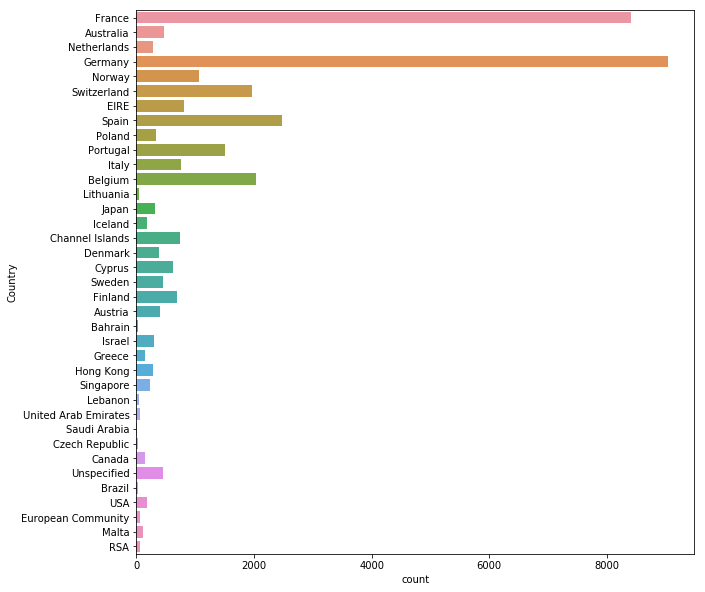

In [14]:
# Your answer here:

# Make figsize using matplotlib
plt.figure(figsize =(10,10))

# Bar plot by country
sns.countplot(y = 'Country', data= data)


In [16]:
# %load solution/m1q3.py

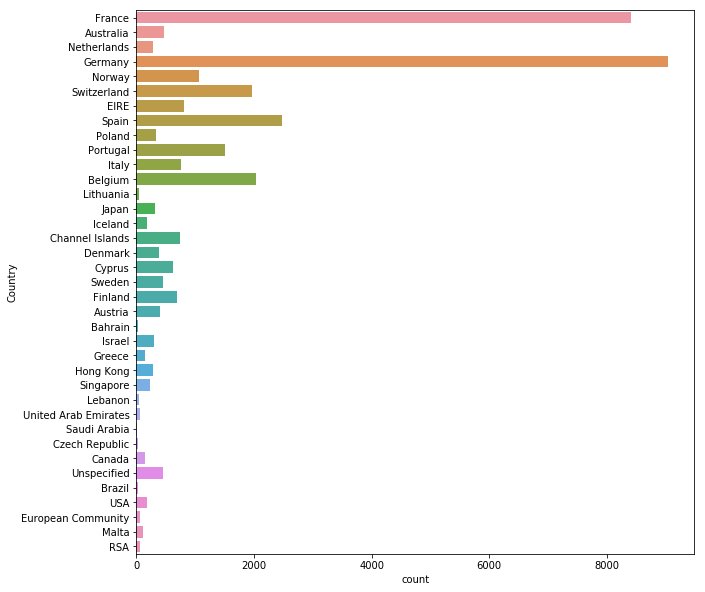

# 2. Data cleaning in raw dataset after inspection

Before we aggregate to the customer level, we need to tidy up a few things at the transaction level, such as handling missing values, grouping sparse terms etc

**Display the number of missing observations for each feature.**

In [15]:
# Missing data by feature
print(data.columns) 

data.isnull().sum() # pandas .isnull() gives boolean result that can be summed up  

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

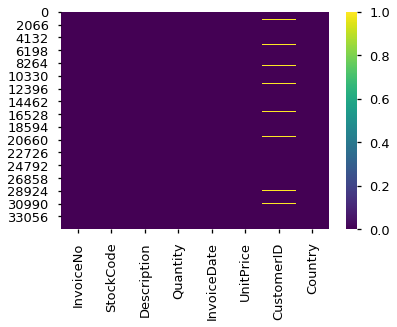

In [23]:
sns.set_context(context = 'talk', rc = {'figsize': (10,20)})
sns.heatmap(data.isnull(), cmap = 'viridis' )

In [24]:
# check what are those missing values records
print(data[data.CustomerID.isnull()].shape)
print(data[data.CustomerID.isnull()].head())

(1418, 8)
     InvoiceNo StockCode                         Description  Quantity  \
158     536885     21832                CHOCOLATE CALCULATOR        24   
159     536885     21523  DOORMAT FANCY FONT HOME SWEET HOME        10   
160     536885     48184               DOORMAT ENGLISH ROSE         10   
161     536885     22837          HOT WATER BOTTLE BABUSHKA         24   
162     536885     22632           HAND WARMER RED RETROSPOT        12   

       InvoiceDate  UnitPrice  CustomerID Country  
158  12/3/10 11:42       1.65         NaN    EIRE  
159  12/3/10 11:42       6.75         NaN    EIRE  
160  12/3/10 11:42       6.75         NaN    EIRE  
161  12/3/10 11:42       4.65         NaN    EIRE  
162  12/3/10 11:42       2.10         NaN    EIRE  


In [25]:
print(data.shape)

(35116, 8)


Q4: drop observations with missing customer ID's, check using methods in pandas package

In [29]:
# Your answer here:
data_updated = data.dropna(subset=['CustomerID'])
print(data_updated.shape)
print(data_updated.head(5))

(33698, 8)
   InvoiceNo StockCode                      Description  Quantity  \
0     536370     22728        ALARM CLOCK BAKELIKE PINK        24   
1     536370     22727        ALARM CLOCK BAKELIKE RED         24   
2     536370     22726       ALARM CLOCK BAKELIKE GREEN        12   
3     536370     21724  PANDA AND BUNNIES STICKER SHEET        12   
4     536370     21883                 STARS GIFT TAPE         24   

    InvoiceDate  UnitPrice  CustomerID Country  
0  12/1/10 8:45       3.75     12583.0  France  
1  12/1/10 8:45       3.75     12583.0  France  
2  12/1/10 8:45       3.75     12583.0  France  
3  12/1/10 8:45       0.85     12583.0  France  
4  12/1/10 8:45       0.65     12583.0  France  


In [16]:
# %load solution/m1q4.py

(33698, 8)
   InvoiceNo StockCode                      Description  Quantity  \
0     536370     22728        ALARM CLOCK BAKELIKE PINK        24   
1     536370     22727        ALARM CLOCK BAKELIKE RED         24   
2     536370     22726       ALARM CLOCK BAKELIKE GREEN        12   
3     536370     21724  PANDA AND BUNNIES STICKER SHEET        12   
4     536370     21883                 STARS GIFT TAPE         24   

    InvoiceDate  UnitPrice  CustomerID Country  
0  12/1/10 8:45       3.75     12583.0  France  
1  12/1/10 8:45       3.75     12583.0  France  
2  12/1/10 8:45       3.75     12583.0  France  
3  12/1/10 8:45       0.85     12583.0  France  
4  12/1/10 8:45       0.65     12583.0  France  


In [30]:
data = data_updated # assign the updated dataframe back to the data variable

**For the Convert customer ID's, when we loaded into Python environment, it is float type, but normally we want to change it into integer data type **

In [31]:
data['CustomerID'].dtypes

dtype('float64')

In [32]:
# Convert customer ID's into integers
data['CustomerID'] = data['CustomerID'].astype('int')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France


** After observing there are columns in UnitPrice and Quantity, it makes sense to derive new Sales column** 

Q5: create the new column Sales by multiplying quantity and unitprice and check by displaying first 5 records

In [33]:
# Your answer here:
data['Sales'] = data.Quantity * data.UnitPrice
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6


In [37]:
# %load solution/m1q5.py

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6


** After cleaning up the dataset, we can save an updated backup dataset for remarking we are finishing the first stage** 

In [53]:
# General Practice: After stage 1, save cleaned transaction-level data into the repository for future usage
data.to_csv('data/cleaned_transaction.csv',index = None)

# Stage 2: Customer-level feature engineering

Now that we have a cleaned transaction-level dataset, it's time for feature engineering dataset at the customer level, which we'll feed into machine learning algorithms for customer segmentation.

In [45]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6


** Aggegrate invoice data "InvoiceNo" column by customer "CustomerID" column to form new feature called total_transaction, save the newly created dataframe using groupby to invoice_data.**

In [38]:
# Your answer here:
invoice_data = data.groupby('CustomerID')['InvoiceNo'].agg({'total_transaction': 'nunique'})

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [ ]:
# %load solution/m1q6.py
invoice_data = data.groupby('CustomerID')['InvoiceNo'].agg({'total_transcation':'nunique'})

In [54]:
invoice_data.head()

,total_transcation
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


Q6: 

By using the same technique, aggregate product data by customer. Engineer 2 features:

'total_products': the total number of products purchased by each customer.

'total_unique_products': the number of unique products purchased by each customer.

Let's name it product_data.

In [40]:
# Your answer here:
product_data = data.groupby('CustomerID')['StockCode'].agg(
                {'total_product': 'count', 
                 'total_unique_product': 'nunique'}
                )
product_data.head()

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,total_product,total_unique_product
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [47]:
# %load solution/m1q6.py

In [44]:
product_data.head()

,total_product,total_unique_product
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


Q7: 

By using the same technique, aggregate sales data by customer. Engineer 2 features:

'total_sales': the total sales for each customer.

'avg_product_value': the average value of the products purchased by the customer (not the UnitPrice!).

Let's name it sales_data.


In [43]:
# Your answer here:
sales_data = data.groupby('CustomerID')['Sales'].agg(
                {'total_sales': 'sum', 
                 'avg_product_value': 'mean'}
                )
sales_data.head()

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


In [51]:
# %load solution/m1q7.py

In [50]:
sales_data.head()

,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


### Intermediary levels for feature engineering

You won't always be able to easily roll up to customer-level directly... Sometimes, it will be easier to create intermediary levels first.


**Let's first aggregate cart data at the "cart-level."**

In [44]:
cart_data = data.groupby(['CustomerID','InvoiceNo'])['Sales'].agg({'cart_value':'sum'})
cart_data.head()

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


cart_value
CustomerID InvoiceNo            
12347      537626         711.79
           542237         475.39
           549222         636.25
           556201         382.52
           562032         584.91

In [45]:
# by using .reset_index, we can get a dataframe which we can further go for feature engineering
cart_data.reset_index(inplace = True)

In [46]:
cart_data.head()

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


Q8: 

By using the same technique, aggregate cart data by customer. Engineer 3 features:

'avg_cart_value': average cart value by customer.

'min_cart_value': minimum cart value by customer.

'max_cart_value': maximum cart value by customer.

Let's name it agg_cart_data.

In [49]:
# Your answer here:
agg_cart_data = cart_data.groupby('CustomerID')['cart_value'].agg(
                {'avg_cart_value': 'mean', 'min_cart_value': 'min', 'max_cart_value': 'max'}
                )
agg_cart_data.head()

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30


In [59]:
# %load solution/m1q8.py

In [60]:
agg_cart_data.head()

,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30


** After feature engineeing the three datasets, we can use the .join function to join them together, and then save it as analytical_base dataset as a backup. **

In [51]:
customer_df = pd.concat([invoice_data, product_data, sales_data, agg_cart_data], axis =1)
customer_df.head()

,total_transaction,total_product,total_unique_product,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [52]:
customer_df.to_csv('data/analytical_base.csv')

In [61]:
customer_df = invoice_data.join([product_data,sales_data,agg_cart_data])

In [62]:
customer_df.head()

,total_transcation,total_product,total_unique_product,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [63]:
# customer_df.to_csv('analytical_base.csv')

## Summary for Module 1

Congratulations!

As a reminder, here are a few things you did in this module:
* You explored and cleaned the transaction-level dataset.
* You then rolled it up to the customer level, aggregating new features along the way.
* You also saw how intermediary groupby's can help you create otherwise tricky features.
* And you joined all of your customer-level datasets together into one analytical base table.